Web Scraping Exercise

In [2]:
import bs4
import requests
import re

In [2]:
## Scraping "Volume 110" from the One Piece wiki

result = requests.get("https://onepiece.fandom.com/wiki/Volume_110")

In [3]:
type(result)

requests.models.Response

In [5]:
result.text

'<!DOCTYPE html>\n<html class="client-nojs sse-other" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Volume 110 | One Piece Wiki | Fandom</title>\n<script>document.documentElement.className="client-js sse-other";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"6178cea8939b58ac3d5470d4a900c82a","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Volume_110","wgTitle":"Volume 110","wgCurRevisionId":2041371,"wgRevisionId":2041371,"wgArticleId":347725,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["One Piece Volumes"],"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgRelevantPageName":"Volume_110","wgRelevantArticle

In [177]:
oden = bs4.BeautifulSoup(result.text,"lxml")

In [178]:
oden

<!DOCTYPE html>
<html class="client-nojs sse-other" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Volume 110 | One Piece Wiki | Fandom</title>
<script>document.documentElement.className="client-js sse-other";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"6178cea8939b58ac3d5470d4a900c82a","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Volume_110","wgTitle":"Volume 110","wgCurRevisionId":2041371,"wgRevisionId":2041371,"wgArticleId":347725,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["One Piece Volumes"],"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgRelevantPageName":"Volume_110","wgRelevantArticleId":34

In [179]:
oden.select('title')

[<title>Volume 110 | One Piece Wiki | Fandom</title>]

In [180]:
## getting more granular...
oden.select('title')[0].getText()

'Volume 110 | One Piece Wiki | Fandom'

In [181]:
## 'h1', 'h2', 'p', 'div', etc. ... take a moment to get familair with what you're looking for...
oden.select('h1')[0].getText()

'\nVolume 110 '

In [182]:
## now we can index!
op_paras = oden.select('p')

In [183]:
op_paras[1]

<p><b>Volume 110</b> is titled "The Ebb and Flow of the Ages".
</p>

In [184]:
op_paras[2].getText()

'The illustration on page 3 of Volume 110.'

In [36]:
## peep the type; this is NOT a string, but a BeautifulSoup object...
type(op_paras[4])

bs4.element.Tag

In [37]:
## the getText output, however...
type(op_paras[8].getText())

str

In [45]:
glyph = oden.select('.toctext')

In [61]:
for i in range(len(glyph)):
    print(glyph[i].getText())

Cover and Volume Illustration
Author's Note
Chapters
SBS Notes
Usopp Gallery Pirates
Volume Changes
Trivia
References
Site Navigation


In [58]:
glyph[0].getText()

'Cover and Volume Illustration'

In [ ]:
## skeleton class for scraping; embellish later:

class Scraper:

    def __init__(self, name):
        self.name = name

    def soupify(self, res, url):
        self.res = requests.get(url)
        self.soup = bs4.BeautifulSoup(res.text,'lxml')


In [ ]:
def wiki_scraper(url):

    res = requests.get(url)
    soup = bs4.BeautifulSoup(res.text,'lxml')
    print(soup.select('title')[0].getText())
    print(soup.select('h1')[0].getText())
    para = soup.select('p')
    
    for i in range(len(tocblock)):
        print(tocblock[i].getText())
    

In [79]:
## start with the 'img' tag and drill down from there for class IDs, etc. ...

oden.select('.thumbimage')[0]['src']

'https://static.wikia.nocookie.net/onepiece/images/7/76/Volume_110_Illustration.png/revision/latest/scale-to-width-down/130?cb=20241030232125'

In [76]:
illustration = requests.get(oden.select('.thumbimage')[0]['src'])

In [77]:
illustration.content

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x82\x00\x00\x00\xcc\x08\x00\x00\x00\x00\x9a:$=\x00\x00\x00\x02bKGD\x00\x00\xaa\x8d#2\x00\x00\x00\tpHYs\x00\x00.#\x00\x00.#\x01x\xa5?v\x00\x00\x00\x07tIME\x07\xe8\n\x1f\x01\x06\x07\xbd\xf545\x00\x00\x01\xc2zTXtRaw profile type icc\x00\x008\x8d\xa5Sk\xce\xdc \x0c\xfc\xcf)z\x04\xe3g8\x0e\x0b\x89\xd4\xfb_\xa0\x06\xc3\xbe\xba_\xa5U-\xa1$c\x18\x8f\xcd$\xfdn-\xfd\x1a\xa1\x86\tF`\x05mJ\xda\x8d\x80yB\xda\xf546\x14dcD\x90C\x8aT\x04\xb0\xf3\xf0t\x05\xc8\xa7/\xf3\xf7\xe6\xcb\x92f%#\x03\xeeB\xac\x12,_\xc6\xe5U\x87\xa2\xbc\x81N\xd8\xef\xca\xbe\x8c\xf4\xe5\xfe\xae.\xdbH\xa3P\xc6\x053$o\x0c\x0c-Z\xca\xba\x12\xa4f>!\xd8x9\x02\xcf\xecz\x0f\x1f\xc7\xc2k\x0b\x1c[\xf2q\xce1F\xa2?\x0e\xbc\xe0g\xbb\xe3\xf6\x84oA\x8e\x0f"\xf6\x9b\t\xa9\x98\xd7\xb0\x11\xfc\xc0g\xfc\x87\xfdiH5\xd4\x1e\xdf\xb4\x13\xec\xb3p\x03\xac\x16\\\xdd\x0b\xce\x1b\xb7\xdd\x1a\'\x87\x9b\x89\xbe\xdf\xd2\xbe\xc9\xa6\xa2\xa7\x88\xd0>\xb0\xd2N\xe0#\x04.\xbe\\\x84\x8c[\x1b\x8d\xeap\x9a\xf8\xd3\x13

In [80]:
op_img = open('/mnt/d/Pictures/op_110_illustration.png','wb')
op_img.write(illustration.content)

21090

### 'Books to Scrape' Exercise

http://books.toscrape.com/

==================================================================================================

In [ ]:
## Goal: get title of every book with a 2-star rating

'https://books.toscrape.com/catalogue/page-1.html'  ## catalog == 1 - 50

In [200]:
base_url = 'https://books.toscrape.com/catalogue/page-{}.html'

### Book Inspection:

- article class = product_pod (article.product_pod)
- div class = image container (div.image_container)
- a href [link]
    - image class = thumbnail [img.thumbnail]
    - src [img link]
    - alt (Title)
- class star-rating Two
- div class product_price

**strategy: grab 'product pod' class and filter off of that...**

In [93]:
book_res = requests.get(base_url.format(1))
book_soup = bs4.BeautifulSoup(book_res.text,'lxml')

In [ ]:
## product pod... where all the info is...

# book_soup.select('.product_pod')[i]

In [203]:
## base product tag

book_prod = book_soup.select('.product_pod')

In [201]:
## star rating tag

book_star = book_prod[0].select('p')[0]['class'][1]

In [204]:
book_star

'Three'

In [202]:
## title tag

book_title = book_prod[0].select('a')[1]['title']

In [ ]:
## URL generator

def catalog(n):
    for url in range(1,n+1):
        yield base_url.format(url)


In [241]:
def starry_eyed(STR):

    two_star_titles = []

    for url in range(1,51):
        book_res = requests.get(base_url.format(url))
        book_soup = bs4.BeautifulSoup(book_res.text,'lxml')
        book_prod = book_soup.select('.product_pod')
    
        for book in book_prod:
            if book.select('p')[0]['class'][1] == STR:
                yield book.select('a')[1]['title']

In [ ]:
starry_eyed("Two")

In [242]:
for title in starry_eyed(STR='Two'):
    print(title)

Starving Hearts (Triangular Trade Trilogy, #1)
Libertarianism for Beginners
It's Only the Himalayas
How Music Works
Maude (1883-1993):She Grew Up with the country
You can't bury them all: Poems
Reasons to Stay Alive
Without Borders (Wanderlove #1)
Soul Reader
Security
Saga, Volume 5 (Saga (Collected Editions) #5)
Reskilling America: Learning to Labor in the Twenty-First Century
Political Suicide: Missteps, Peccadilloes, Bad Calls, Backroom Hijinx, Sordid Pasts, Rotten Breaks, and Just Plain Dumb Mistakes in the Annals of American Politics
Obsidian (Lux #1)
My Paris Kitchen: Recipes and Stories
Masks and Shadows
Lumberjanes, Vol. 2: Friendship to the Max (Lumberjanes #5-8)
Lumberjanes Vol. 3: A Terrible Plan (Lumberjanes #9-12)
Judo: Seven Steps to Black Belt (an Introductory Guide for Beginners)
I Hate Fairyland, Vol. 1: Madly Ever After (I Hate Fairyland (Compilations) #1-5)
Giant Days, Vol. 2 (Giant Days #5-8)
Everydata: The Misinformation Hidden in the Little Data You Consume Every 

In [ ]:
for n in range(1,51):
    
    for book in book_prod:

        if book_star == "Two":
            print(book_title)

### =================================================================================

Extra Credit: Hoodwinkler Scraping (I hope Jackie don't catch me...)

In [3]:
wink = requests.get('https://www.hoodwinkler.com/')
hood = bs4.BeautifulSoup(wink.text,'lxml')
hood

<!DOCTYPE html>
<html lang="en">
<head>
<!-- Title and description ================================================== -->
<meta content="authenticity_token" name="csrf-param"/>
<meta content="ehGwX50N3WXRDyR78nR+VGPZ9I9XUnZHBhXBuG/208nUMa1ATJ5jdgaoVSy9wKVv4OaPUtZ5NKwtLyOnjMnMcw==" name="csrf-token"/>
<title>
      
        hoodwinkler.com
      
    </title>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no" name="viewport"/>
<!-- Helpers ================================================== -->
<meta content="website" property="og:type"/>
<meta content="https://www.hoodwinkler.com" property="og:url"/>
<meta content="summary_large_image" name="twitter:card"/>
<meta content="hoodwinkler.com" property="og:title"/>
<meta content="hoodwinkler.com" name="twitter:title"/>
<link href="https://kajabi-storefronts-production.kajabi-cdn.com/kajabi-storefronts-production/themes/

### =================================================================================

Working with Images:

In [11]:
from PIL import Image as img

In [12]:
mac = img.open('images/example.jpg')

In [13]:
type(mac)

PIL.JpegImagePlugin.JpegImageFile

In [16]:
#mac.show()
mac.size

(1993, 1257)

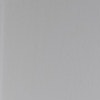

In [18]:
mac.crop((0,0,100,100))

In [21]:
pen = img.open('images/pencils.jpg')
pen.size

(1950, 1300)

In [114]:
## function crops from the center of the image used
## needs serious improvements...

def crop_img(image, left:float, up:float, right:float, down:float):

    w = image.size[0]
    h = image.size[1]

    w1 = w/2 - left
    h1 = h/2 - up
    w2 = w/2 + right
    h2 = h/2 + down

    return image.crop((w1,h1,w2,h2))

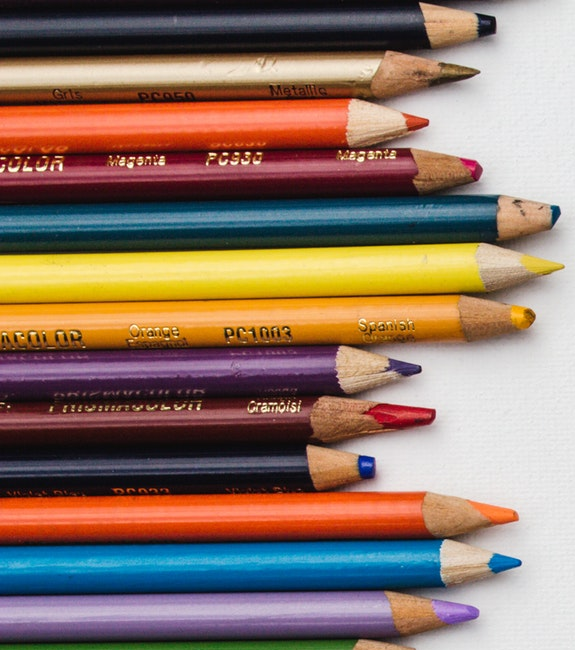

In [117]:
#pen.crop((0,0,300,1350))

crop_img(pen,(pen.size[0]/2),(pen.size[1]/2),-400,0)

In [118]:
words = img.open('images/word_matrix.png')
mask = img.open('images/mask.png')

In [119]:
words.size

(1015, 559)

In [120]:
mask.size

(505, 251)

In [124]:
msk1 = mask.resize((1015,559))

In [ ]:
msk1.putalpha(128)

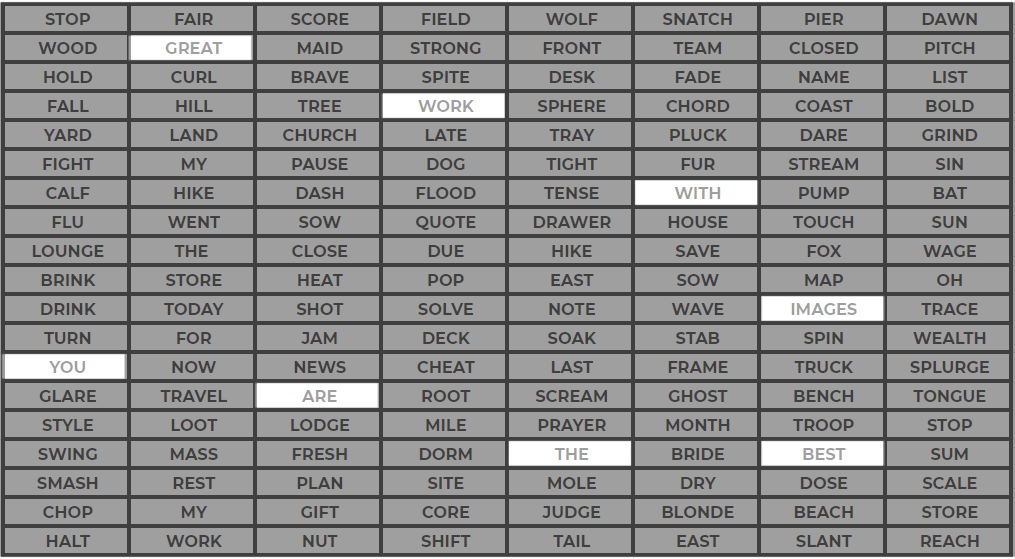

In [129]:
words.paste(msk1,(0,0),mask=msk1)
words

In [1]:
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

number = 1234.56
formatted = locale.currency(number)
print(formatted)
print(type(formatted))

Error: unsupported locale setting

In [ ]:
list_of_strings = ["abc:123", "def:456", "ghi:789"]

# Iterate over the list and modify the part after `:`
for i in range(len(list_of_strings)):
    list_of_strings[i] = list_of_strings[i].split(':')[0] + ":new_value"

# Print the modified list
print(list_of_strings)

open()

In [ ]:
import re

list_of_strings = ["abc:123", "def:456", "ghi:789"]

# Iterate over the list and use a regex to replace the part after `:`
for i in range(len(list_of_strings)):
    list_of_strings[i] = re.sub(r':.*$', ':new_value', list_of_strings[i])

# Print the modified list
print(list_of_strings)

In [ ]:
# Open the file in read mode
with open('filename.txt', 'r') as file:
    # Print the contents of the file
    print(file.read())

In [ ]:
#import sh

with open('../locale.conf', 'r') as f:
    print(f.read())

LANG="C.UTF-8"



In [ ]:
### alt. read:

with open('filename.txt', 'r') as file:
    for line in file:
        print(line, end='')


In [ ]:
import os

if not os.path.exists('filename.txt'):
    with open('filename.txt', 'w'): ## 'a' for append; 'w' for write...
        pass  # Create the file if it doesn't exist


3-cup-monte.py	       name-change.py		  test.ipynb
README.md	       playground1.ipynb	  tic-tac-toe.py
blackjack	       playground2.ipynb	  udemy-milestone-1-prep.ipynb
finance-tracker.ipynb  playground3.ipynb	  war-card-game-com.py
images		       playground5.ipynb	  web-scraper-template.ipynb
locale.conf	       portfolio_mgt_pilot.ipynb
